In [1]:
import transformers
import torch
import datasets
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# load dataset
dataset = datasets.load_dataset("cringgaard/boatsV2", use_auth_token=True)
dataset = dataset["train"]
dataset

Using custom data configuration cringgaard--boatsV2-2a63089b8a44e701
Reusing dataset parquet (C:\Users\chris\.cache\huggingface\datasets\cringgaard___parquet\cringgaard--boatsV2-2a63089b8a44e701\0.0.0\2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'title', 'manufacturer', 'length', 'size category', 'year built'],
    num_rows: 12835
})

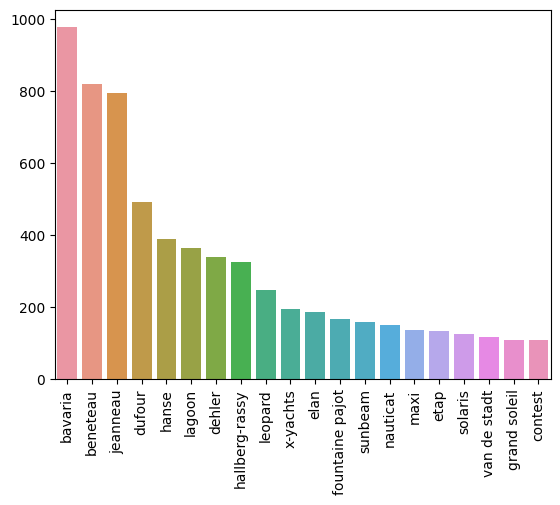

In [3]:
# do statistics on manufacturer
manufacturer_counts = np.unique(dataset["manufacturer"], return_counts=True)
manufacturer_counts = list(zip(manufacturer_counts[0], manufacturer_counts[1]))
manufacturer_counts = sorted(manufacturer_counts, key=lambda x: x[1], reverse=True)
# take top 20 manufacturers
manufacturer_counts = manufacturer_counts[:20]
top_manufacturers = [x[0] for x in manufacturer_counts]
sns.barplot(x=[x[0] for x in manufacturer_counts], y=[x[1] for x in manufacturer_counts])
plt.xticks(rotation=90)
plt.show()

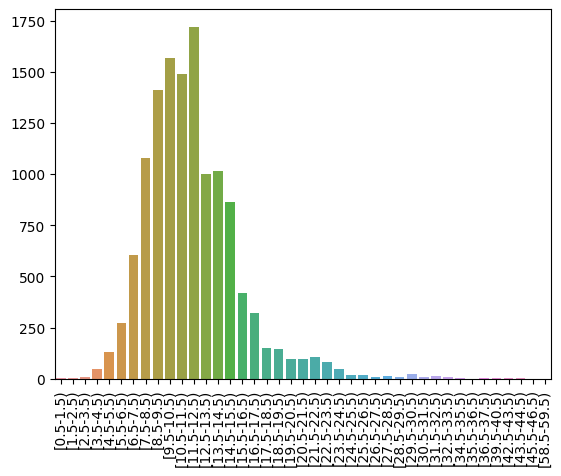

In [4]:
# see how many boats are in each category
category_counts = np.unique(dataset["size category"], return_counts=True)
category_counts = list(zip(category_counts[0], category_counts[1]))
# sort by numerical category name 
def extract_number(x):
    return float(x[0].split("-")[0].strip("["))
category_counts = sorted(category_counts, key=extract_number)
sns.barplot(x=[x[0] for x in category_counts], y=[x[1] for x in category_counts])
plt.xticks(rotation=90)
plt.show()


In [5]:
from tqdm import tqdm
# show size distribution for top 20 manufacturers in the same plot
size_intervals = {size: 0 for size in np.unique(dataset["size category"])}
plotting_dict = {manufacturer: size_intervals.copy() for manufacturer in top_manufacturers}
# extract only top 20 manufacturers
top20_dataset = dataset.filter(lambda x: x["manufacturer"] in top_manufacturers)
for i in tqdm(range(len(top20_dataset))):
    manufacturer = dataset["manufacturer"][i]
    size = dataset["size category"][i]
    if manufacturer in top_manufacturers:
        plotting_dict[manufacturer][size] += 1
print(plotting_dict)

Loading cached processed dataset at C:\Users\chris\.cache\huggingface\datasets\cringgaard___parquet\cringgaard--boatsV2-2a63089b8a44e701\0.0.0\2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec\cache-5d8244bb2723a5d0.arrow
100%|██████████| 6330/6330 [02:39<00:00, 39.57it/s]

{'bavaria': {'[0.5-1.5)': 0, '[1.5-2.5)': 0, '[10.5-11.5)': 79, '[11.5-12.5)': 114, '[12.5-13.5)': 29, '[13.5-14.5)': 71, '[14.5-15.5)': 36, '[15.5-16.5)': 9, '[16.5-17.5)': 8, '[17.5-18.5)': 0, '[18.5-19.5)': 0, '[19.5-20.5)': 0, '[2.5-3.5)': 1, '[20.5-21.5)': 0, '[21.5-22.5)': 0, '[22.5-23.5)': 0, '[23.5-24.5)': 0, '[24.5-25.5)': 0, '[25.5-26.5)': 0, '[26.5-27.5)': 0, '[27.5-28.5)': 0, '[28.5-29.5)': 0, '[29.5-30.5)': 0, '[3.5-4.5)': 0, '[30.5-31.5)': 0, '[31.5-32.5)': 0, '[32.5-33.5)': 0, '[34.5-35.5)': 0, '[35.5-36.5)': 0, '[36.5-37.5)': 0, '[39.5-40.5)': 0, '[4.5-5.5)': 0, '[42.5-43.5)': 0, '[43.5-44.5)': 0, '[45.5-46.5)': 0, '[5.5-6.5)': 0, '[58.5-59.5)': 0, '[6.5-7.5)': 13, '[7.5-8.5)': 10, '[8.5-9.5)': 21, '[9.5-10.5)': 86}, 'beneteau': {'[0.5-1.5)': 0, '[1.5-2.5)': 0, '[10.5-11.5)': 25, '[11.5-12.5)': 47, '[12.5-13.5)': 33, '[13.5-14.5)': 33, '[14.5-15.5)': 69, '[15.5-16.5)': 26, '[16.5-17.5)': 22, '[17.5-18.5)': 17, '[18.5-19.5)': 1, '[19.5-20.5)': 0, '[2.5-3.5)': 0, '[20.5-2

In [ ]:
# plot
fig, ax = plt.subplots()
k = 0
for manufacturer in top_manufacturers:
    # sort by numerical category name
    sorted_sizes = sorted(plotting_dict[manufacturer].items(), key=lambda x: extract_number(x))
    if k < 10:
        ax.plot([x[0] for x in sorted_sizes], [x[1] for x in sorted_sizes], label=manufacturer, linestyle="--")
    else:
        ax.plot([x[0] for x in sorted_sizes], [x[1] for x in sorted_sizes], label=manufacturer, linestyle="-")
    k += 1
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
# plot size distribution for top 20 manufacturers in separate plots
for manufacturer in top_manufacturers:
    sorted_sizes = sorted(plotting_dict[manufacturer].items(), key=lambda x: extract_number(x))
    sns.barplot(x=[x[0] for x in sorted_sizes], y=[x[1] for x in sorted_sizes])
    plt.title(manufacturer)
    plt.xticks(rotation=90)
    plt.show()